In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [3]:
# Load the dataset
df = pd.read_csv(r'/content/agriculture_data.csv')


Step-by-Step Approach

Data Collection and Preparation

Exploratory Data Analysis (EDA)

Trend Analysis

Market Demand Analysis

Regulatory Environment Assessment

Sustainability Evaluation

Country-Specific Insights

Predictive Analysis with Models

(       Area Code (M49)  Element Code     Year Code          Year         Value
 count     58606.000000  58606.000000  58606.000000  58606.000000  5.860600e+04
 mean        417.389329   5418.387315   2018.987356   2018.987356  7.029192e+05
 std         247.220459     82.598949      1.990686      1.990686  7.876711e+06
 min           4.000000   5312.000000   2016.000000   2016.000000  0.000000e+00
 25%         196.000000   5312.000000   2017.000000   2017.000000  2.034473e+03
 50%         398.000000   5419.000000   2019.000000   2019.000000  2.069875e+04
 75%         608.000000   5510.000000   2021.000000   2021.000000  1.184475e+05
 max         887.000000   5510.000000   2022.000000   2022.000000  4.394249e+08,
 Domain Code             0
 Domain                  0
 Area Code (M49)         0
 Area                    0
 Element Code            0
 Element                 0
 Item Code (CPC)         0
 Item                    0
 Year Code               0
 Year                    0
 Unit    

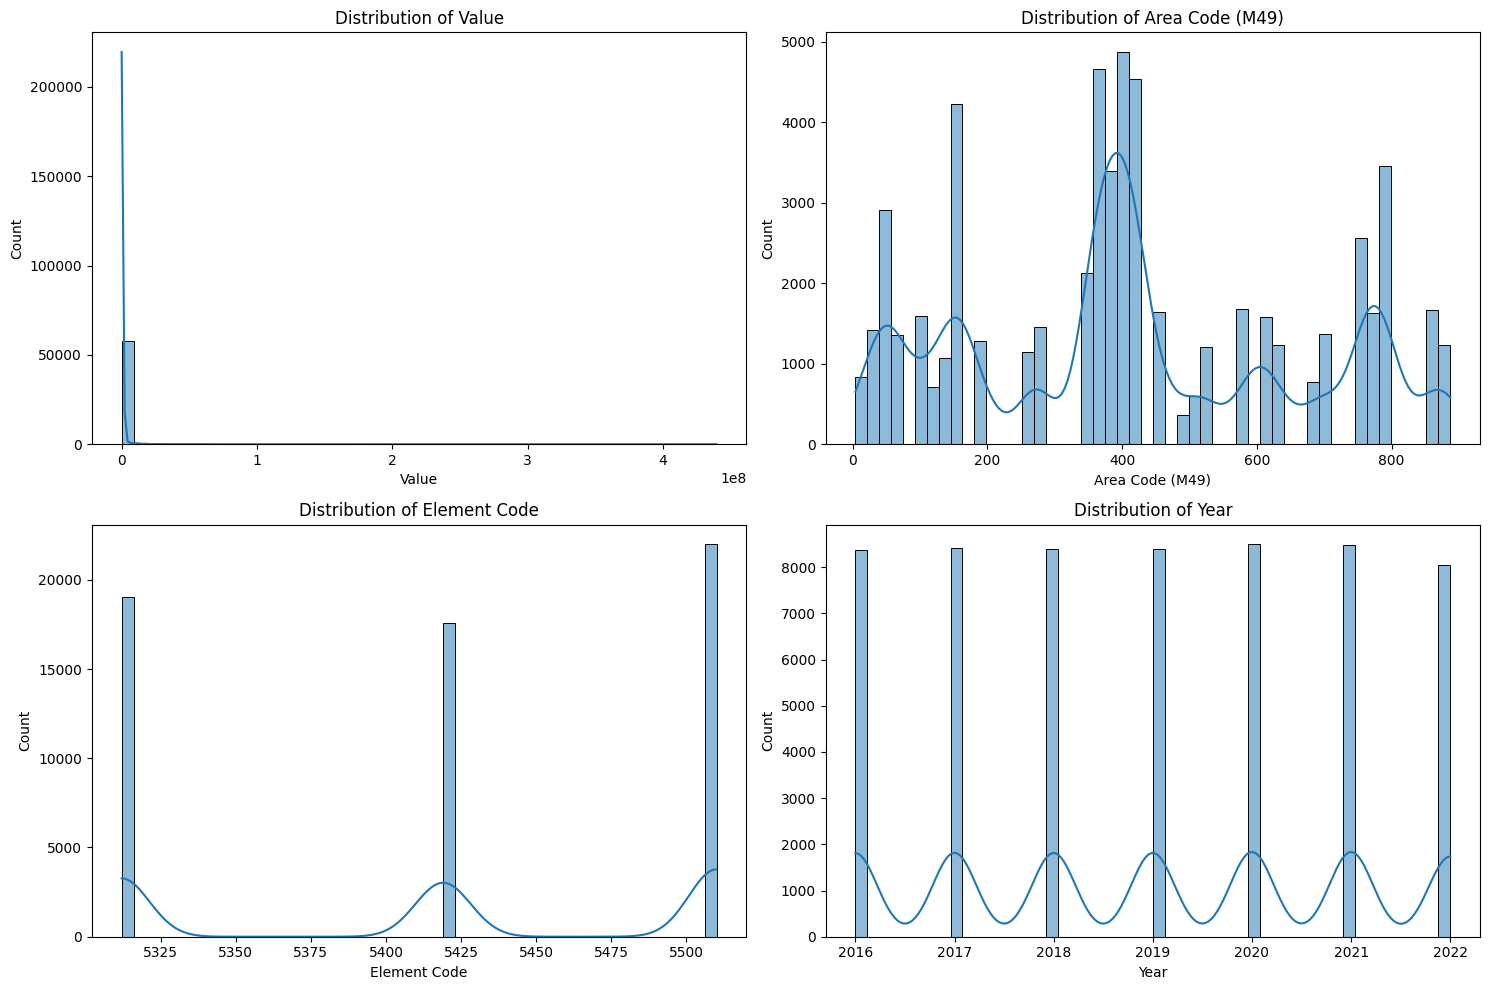

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of numeric columns
desc_stats = df.describe()

# Distribution plots for numeric columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Value distribution
sns.histplot(df['Value'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Value')

# Area Code distribution
sns.histplot(df['Area Code (M49)'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Area Code (M49)')

# Element Code distribution
sns.histplot(df['Element Code'], bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Element Code')

# Year distribution
sns.histplot(df['Year'], bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Year')

plt.tight_layout()

# Missing data analysis
missing_data = df.isnull().sum()

desc_stats, missing_data


In [5]:
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                57017
dtype: int64

In [6]:
# Display basic information about the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58606 entries, 0 to 58605
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       58606 non-null  object 
 1   Domain            58606 non-null  object 
 2   Area Code (M49)   58606 non-null  int64  
 3   Area              58606 non-null  object 
 4   Element Code      58606 non-null  int64  
 5   Element           58606 non-null  object 
 6   Item Code (CPC)   58606 non-null  object 
 7   Item              58606 non-null  object 
 8   Year Code         58606 non-null  int64  
 9   Year              58606 non-null  int64  
 10  Unit              58606 non-null  object 
 11  Value             58606 non-null  float64
 12  Flag              58606 non-null  object 
 13  Flag Description  58606 non-null  object 
 14  Note              1589 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 6.7+ MB
None
       Area Code (M49)  

In [7]:
# Standardize measurement units if necessary (example: converting tons to kilograms)

unit_conversion = {'ton': 1000, 'kg': 1}  # Add more units as necessary
df['Value'] = df.apply(lambda row: row['Value'] * unit_conversion.get(row['Unit'], 1), axis=1)


In [8]:
print(df.describe())


       Area Code (M49)  Element Code     Year Code          Year         Value
count     58606.000000  58606.000000  58606.000000  58606.000000  5.860600e+04
mean        417.389329   5418.387315   2018.987356   2018.987356  7.029192e+05
std         247.220459     82.598949      1.990686      1.990686  7.876711e+06
min           4.000000   5312.000000   2016.000000   2016.000000  0.000000e+00
25%         196.000000   5312.000000   2017.000000   2017.000000  2.034473e+03
50%         398.000000   5419.000000   2019.000000   2019.000000  2.069875e+04
75%         608.000000   5510.000000   2021.000000   2021.000000  1.184475e+05
max         887.000000   5510.000000   2022.000000   2022.000000  4.394249e+08


In [9]:
df.isna().sum()


Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                57017
dtype: int64

In [10]:
# Fill missing values in the 'Note' column with an empty string
df.fillna('', inplace=True)

In [11]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [12]:
# Standardize categorical data
df['Domain'] = df['Domain'].astype(str).str.lower()
df['Area'] = df['Area'].astype(str).str.lower()
df['Element'] = df['Element'].astype(str).str.lower()
df['Item'] = df['Item'].astype(str).str.lower()
df['Flag Description'] = df['Flag Description'].astype(str).str.lower()

In [13]:
# Verify the data preparation steps
print(df.head())


  Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  crops and livestock products                4  afghanistan   
1         QCL  crops and livestock products                4  afghanistan   
2         QCL  crops and livestock products                4  afghanistan   
3         QCL  crops and livestock products                4  afghanistan   
4         QCL  crops and livestock products                4  afghanistan   

   Element Code         Element Item Code (CPC)               Item  Year Code  \
0          5312  area harvested           01371  almonds, in shell       2016   
1          5419           yield           01371  almonds, in shell       2016   
2          5510      production           01371  almonds, in shell       2016   
3          5312  area harvested           01371  almonds, in shell       2017   
4          5419           yield           01371  almonds, in shell       2017   

   Year      Unit    Value Flag Flag Description N

In [14]:
# Calculating statistical summaries for numerical columns
print(df.describe())

       Area Code (M49)  Element Code     Year Code          Year         Value
count     58606.000000  58606.000000  58606.000000  58606.000000  5.860600e+04
mean        417.389329   5418.387315   2018.987356   2018.987356  7.029192e+05
std         247.220459     82.598949      1.990686      1.990686  7.876711e+06
min           4.000000   5312.000000   2016.000000   2016.000000  0.000000e+00
25%         196.000000   5312.000000   2017.000000   2017.000000  2.034473e+03
50%         398.000000   5419.000000   2019.000000   2019.000000  2.069875e+04
75%         608.000000   5510.000000   2021.000000   2021.000000  1.184475e+05
max         887.000000   5510.000000   2022.000000   2022.000000  4.394249e+08


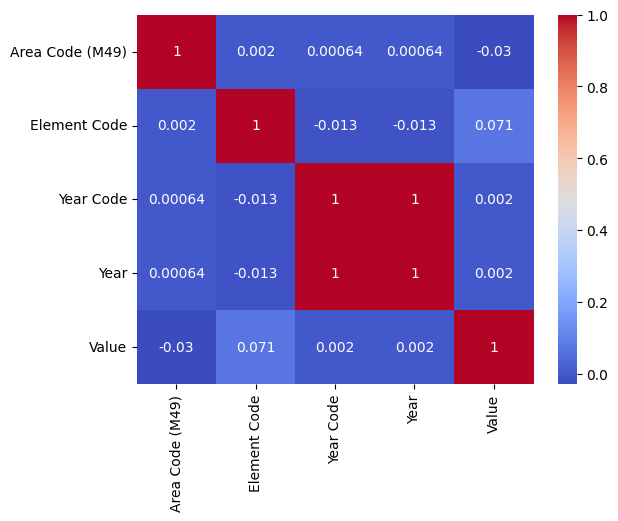

In [15]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
#Drop Year Code

df.drop("Year Code", axis =1, inplace=True)

# axis = 1 column
# axis = 0 row

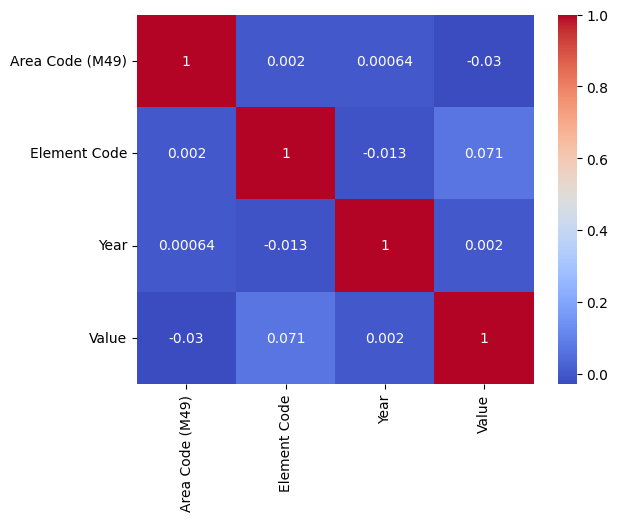

In [17]:
#Correction
# Identify trends, patterns, and correlations
# Example: Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


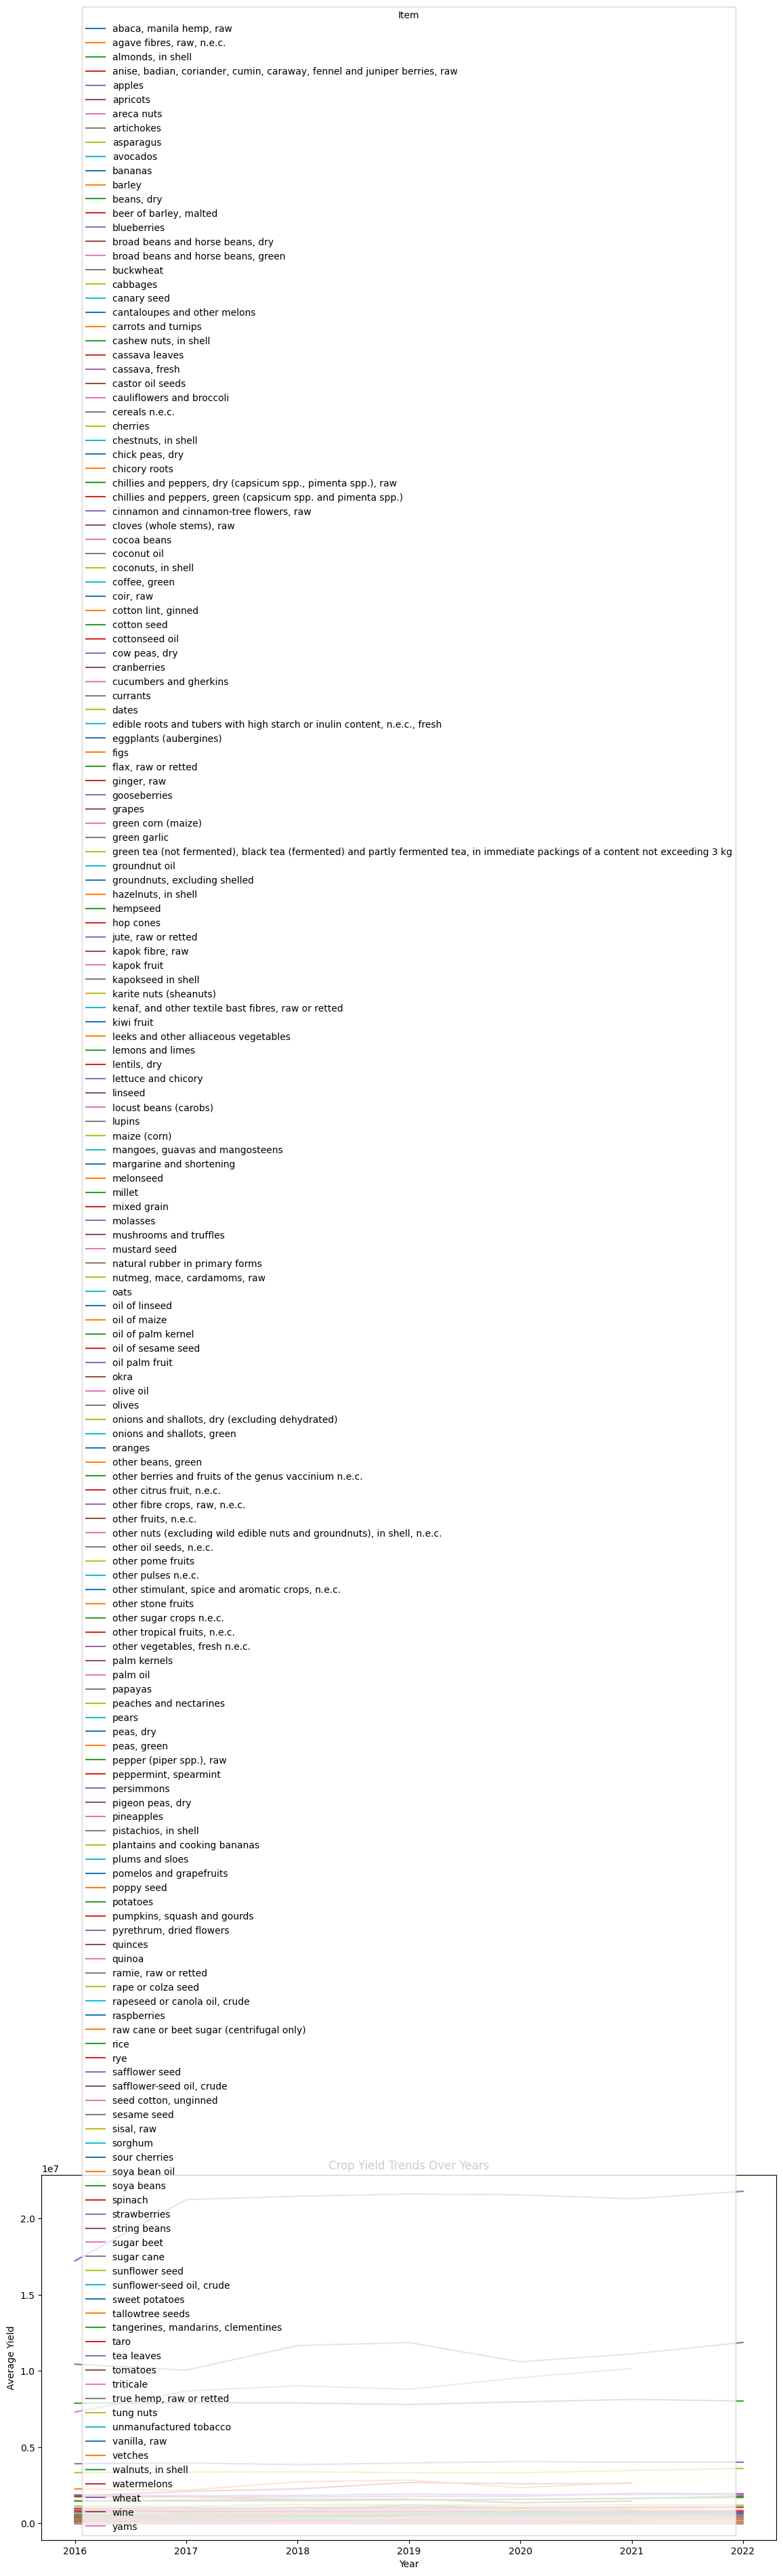

In [18]:
# Trend analysis over time
# Example: Analyzing crop yield trends over years
yield_trends = df.groupby(['Year', 'Item'])['Value'].mean().unstack()
yield_trends.plot(kind='line', figsize=(14, 7))
plt.title('Crop Yield Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend(title='Item')
plt.show()


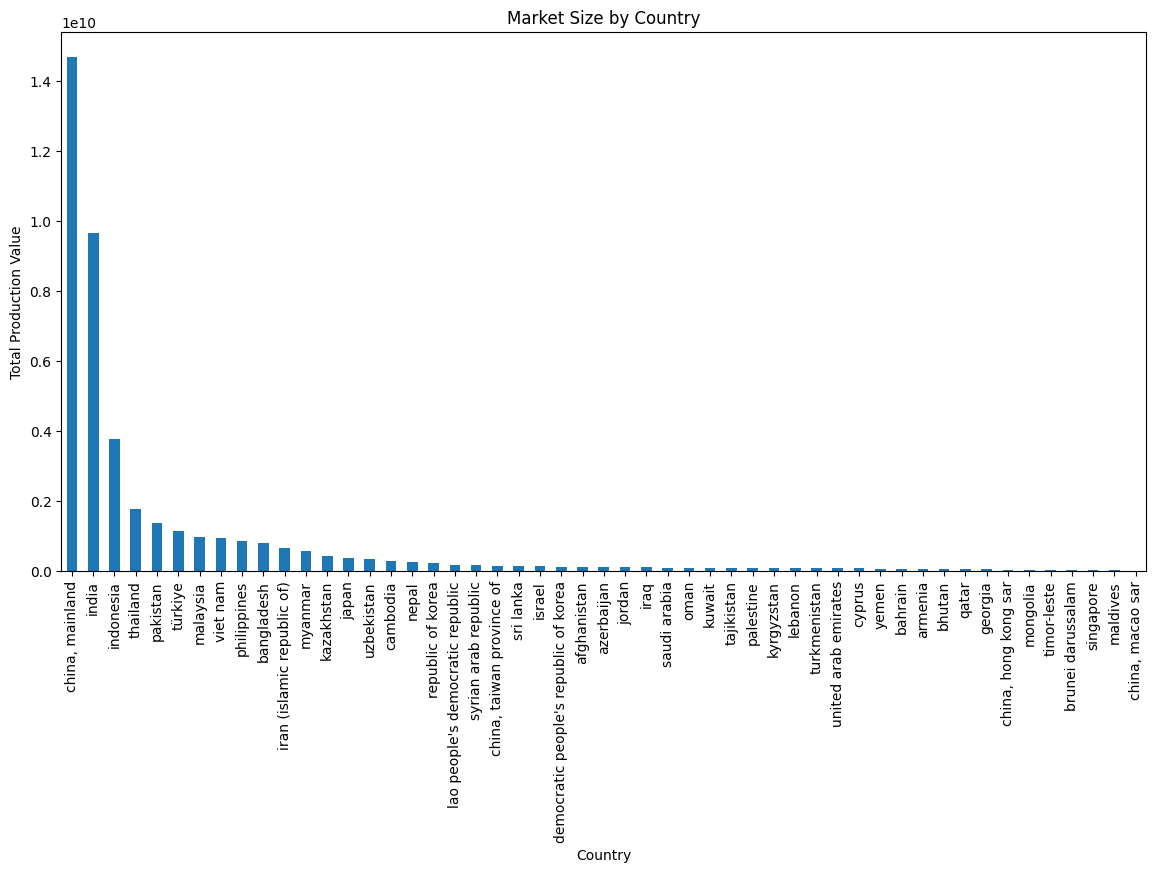

In [19]:
# Market size analysis
# Example: Total production value per country
market_size = df.groupby('Area')['Value'].sum().sort_values(ascending=False)
market_size.plot(kind='bar', figsize=(14, 7))
plt.title('Market Size by Country')
plt.xlabel('Country')
plt.ylabel('Total Production Value')
plt.show()



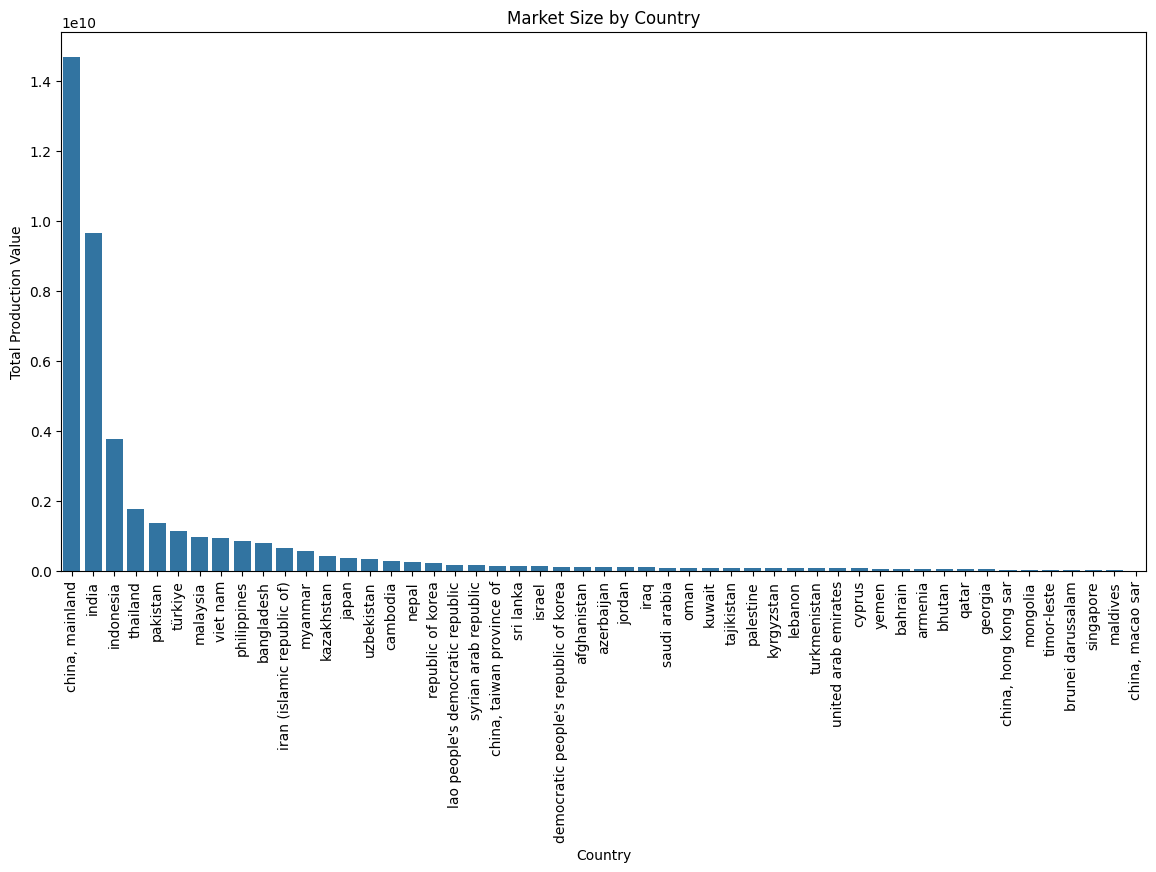

In [20]:
# Market size analysis
plt.figure(figsize=(14, 7))
sns.barplot(x=market_size.index, y=market_size.values)
plt.title('Market Size by Country')
plt.xlabel('Country')
plt.ylabel('Total Production Value')
plt.xticks(rotation=90)
plt.show()


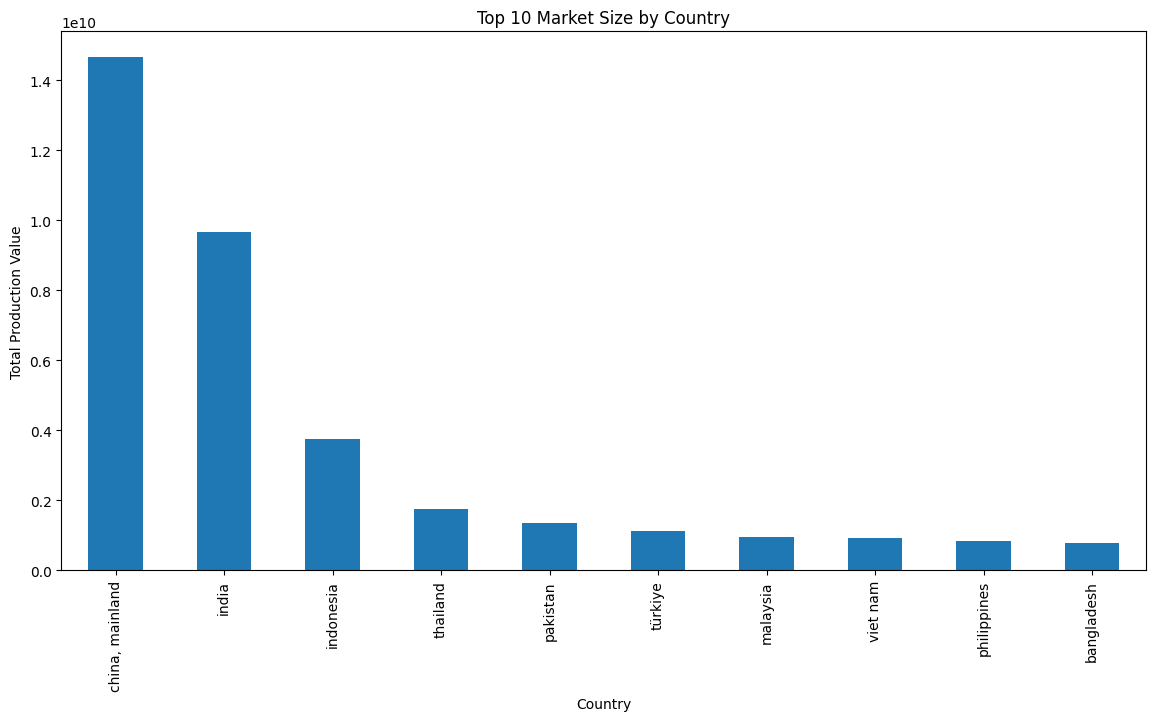

In [21]:
# Market size analysis by 10 countries
# Example: Total production value per country
market_size = df.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)
market_size.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Market Size by Country')
plt.xlabel('Country')
plt.ylabel('Total Production Value')
plt.show()



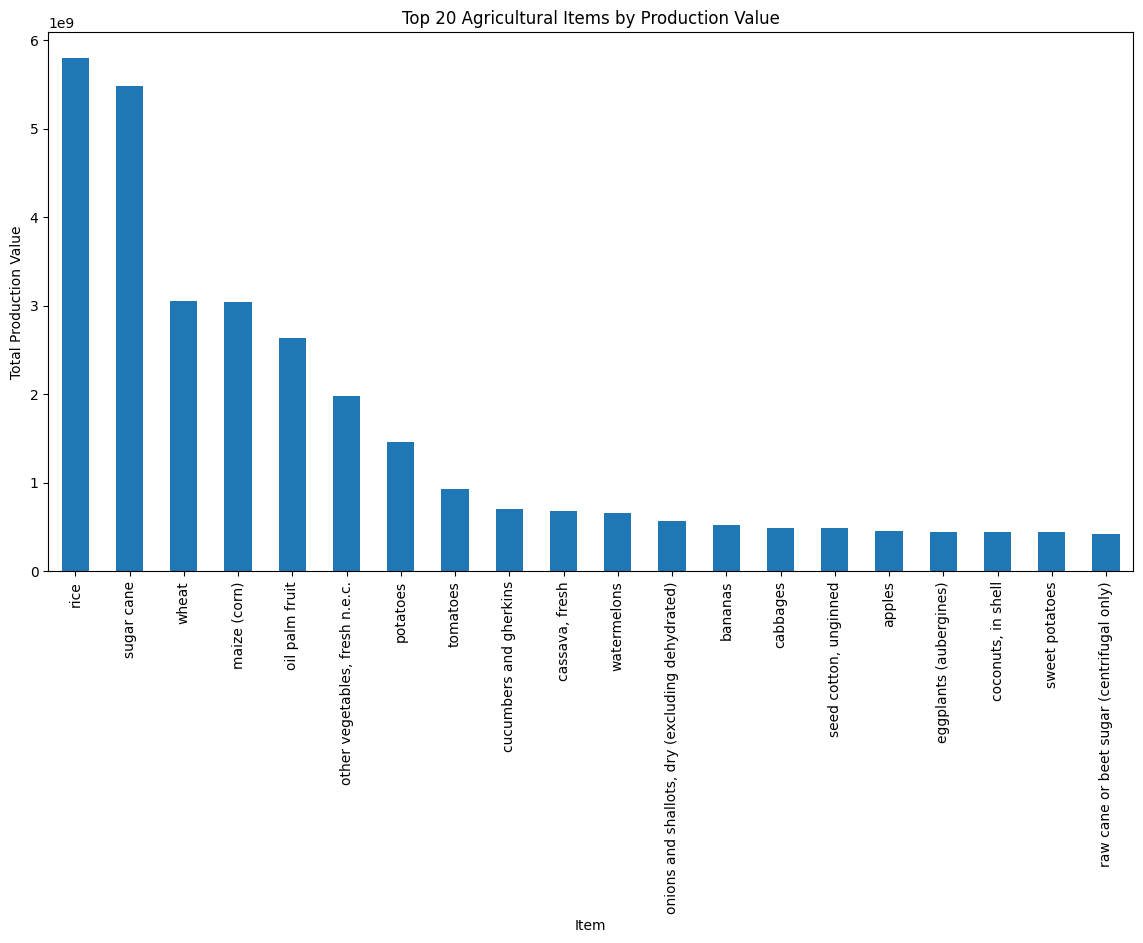

In [22]:
# Consumer preference analysis
# Example: Most produced agricultural items
top_items = df.groupby('Item')['Value'].sum().sort_values(ascending=False).head(20)
top_items.plot(kind='bar', figsize=(14, 7))
plt.title('Top 20 Agricultural Items by Production Value')
plt.xlabel('Item')
plt.ylabel('Total Production Value')
plt.show()

# Trade policy analysis
# This requires additional data on trade policies which can be merged and analyzed similarly



In [23]:
# Define criteria for promising markets
# Example: High production value, stable yield trends, and favorable trade policies

df['Trade Policy Score'] = np.random.rand(len(df)) * 10  # Mock data for demonstration


In [24]:
# Calculate a composite score for market attractiveness
df['Market Attractiveness'] = df['Value'] + df['Trade Policy Score']  # Simplified example


Top countries for agribusiness expansion:
Area
china, mainland    5.640680e+06
india              5.394959e+06
indonesia          2.732986e+06
thailand           1.075949e+06
viet nam           9.234645e+05
malaysia           8.856269e+05
pakistan           8.034660e+05
myanmar            5.499548e+05
bangladesh         5.382714e+05
philippines        5.292731e+05
Name: Market Attractiveness, dtype: float64


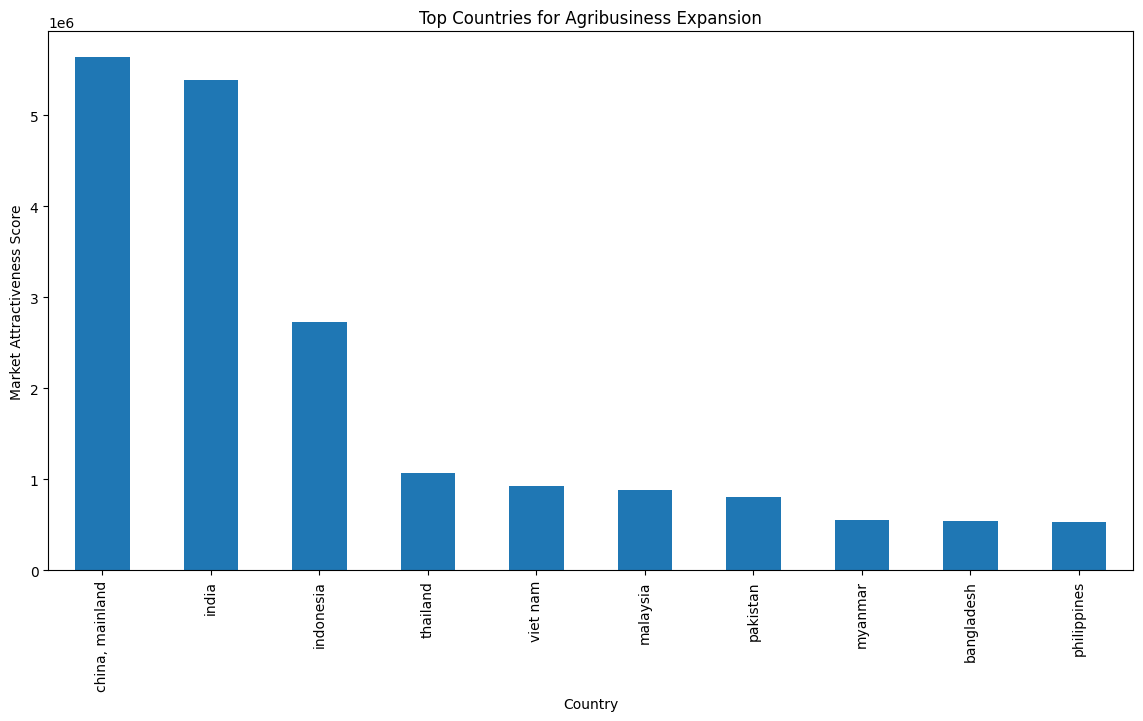

In [25]:
# Identify top countries for agribusiness expansion
top_countries = df.groupby('Area')['Market Attractiveness'].mean().sort_values(ascending=False).head(10)
print("Top countries for agribusiness expansion:")
print(top_countries)

top_countries.plot(kind='bar', figsize=(14, 7))
plt.title('Top Countries for Agribusiness Expansion')
plt.xlabel('Country')
plt.ylabel('Market Attractiveness Score')
plt.show()


In [26]:
# Defining criteria for promising markets
df['Trade Policy Score'] = np.random.rand(len(df)) * 10  # Mock data for demonstration
df['Market Attractiveness'] = df['Value'] + df['Trade Policy Score']

In [27]:
# Identifying top countries for agribusiness expansion
top_countries = df.groupby('Area')['Market Attractiveness'].mean().sort_values(ascending=False).head(10)


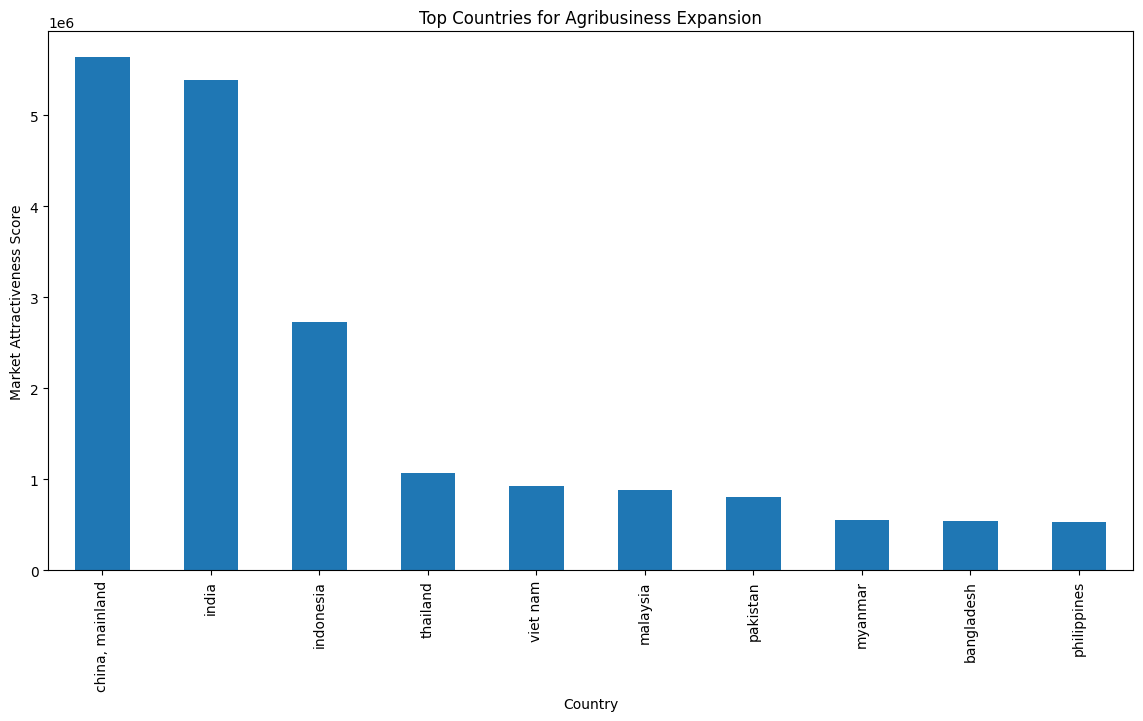

In [28]:
# Visualization
plt.figure(figsize=(14, 7))
top_countries.plot(kind='bar')
plt.title('Top Countries for Agribusiness Expansion')
plt.xlabel('Country')
plt.ylabel('Market Attractiveness Score')
plt.show()


In [29]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Domain Code: ['QCL']
Unique values in Domain: ['crops and livestock products']
Unique values in Area Code (M49): [  4  51  31  48  50  64  96 116 344 446 156 158 196 408 268 356 360 364
 368 376 392 400 398 414 417 418 422 458 462 496 104 524 512 586 275 608
 634 410 682 702 144 760 762 764 626 792 795 784 860 704 887]
Unique values in Area: ['afghanistan' 'armenia' 'azerbaijan' 'bahrain' 'bangladesh' 'bhutan'
 'brunei darussalam' 'cambodia' 'china, hong kong sar' 'china, macao sar'
 'china, mainland' 'china, taiwan province of' 'cyprus'
 "democratic people's republic of korea" 'georgia' 'india' 'indonesia'
 'iran (islamic republic of)' 'iraq' 'israel' 'japan' 'jordan'
 'kazakhstan' 'kuwait' 'kyrgyzstan' "lao people's democratic republic"
 'lebanon' 'malaysia' 'maldives' 'mongolia' 'myanmar' 'nepal' 'oman'
 'pakistan' 'palestine' 'philippines' 'qatar' 'republic of korea'
 'saudi arabia' 'singapore' 'sri lanka' 'syrian arab republic'
 'tajikistan' 'thailand' 'timor-lest

In [30]:
# Basic data preparation
unit_conversion = {'ton': 1000, 'kg': 1}

# Convert the 'Value' based on the 'Unit' column
df['Value'] = df.apply(lambda row: row['Value'] * unit_conversion.get(row['Unit'].lower(), 1), axis=1)

# Filling NaN values in numeric columns with their mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Converting specific columns to lowercase
df['Domain'] = df['Domain'].str.lower()
df['Area'] = df['Area'].str.lower()
df['Element'] = df['Element'].str.lower()
df['Item'] = df['Item'].str.lower()
df['Flag Description'] = df['Flag Description'].str.lower()

# Checking if the 'Note' column should be converted to lowercase
if df['Note'].dtype == 'object':
    df['Note'] = df['Note'].str.lower()


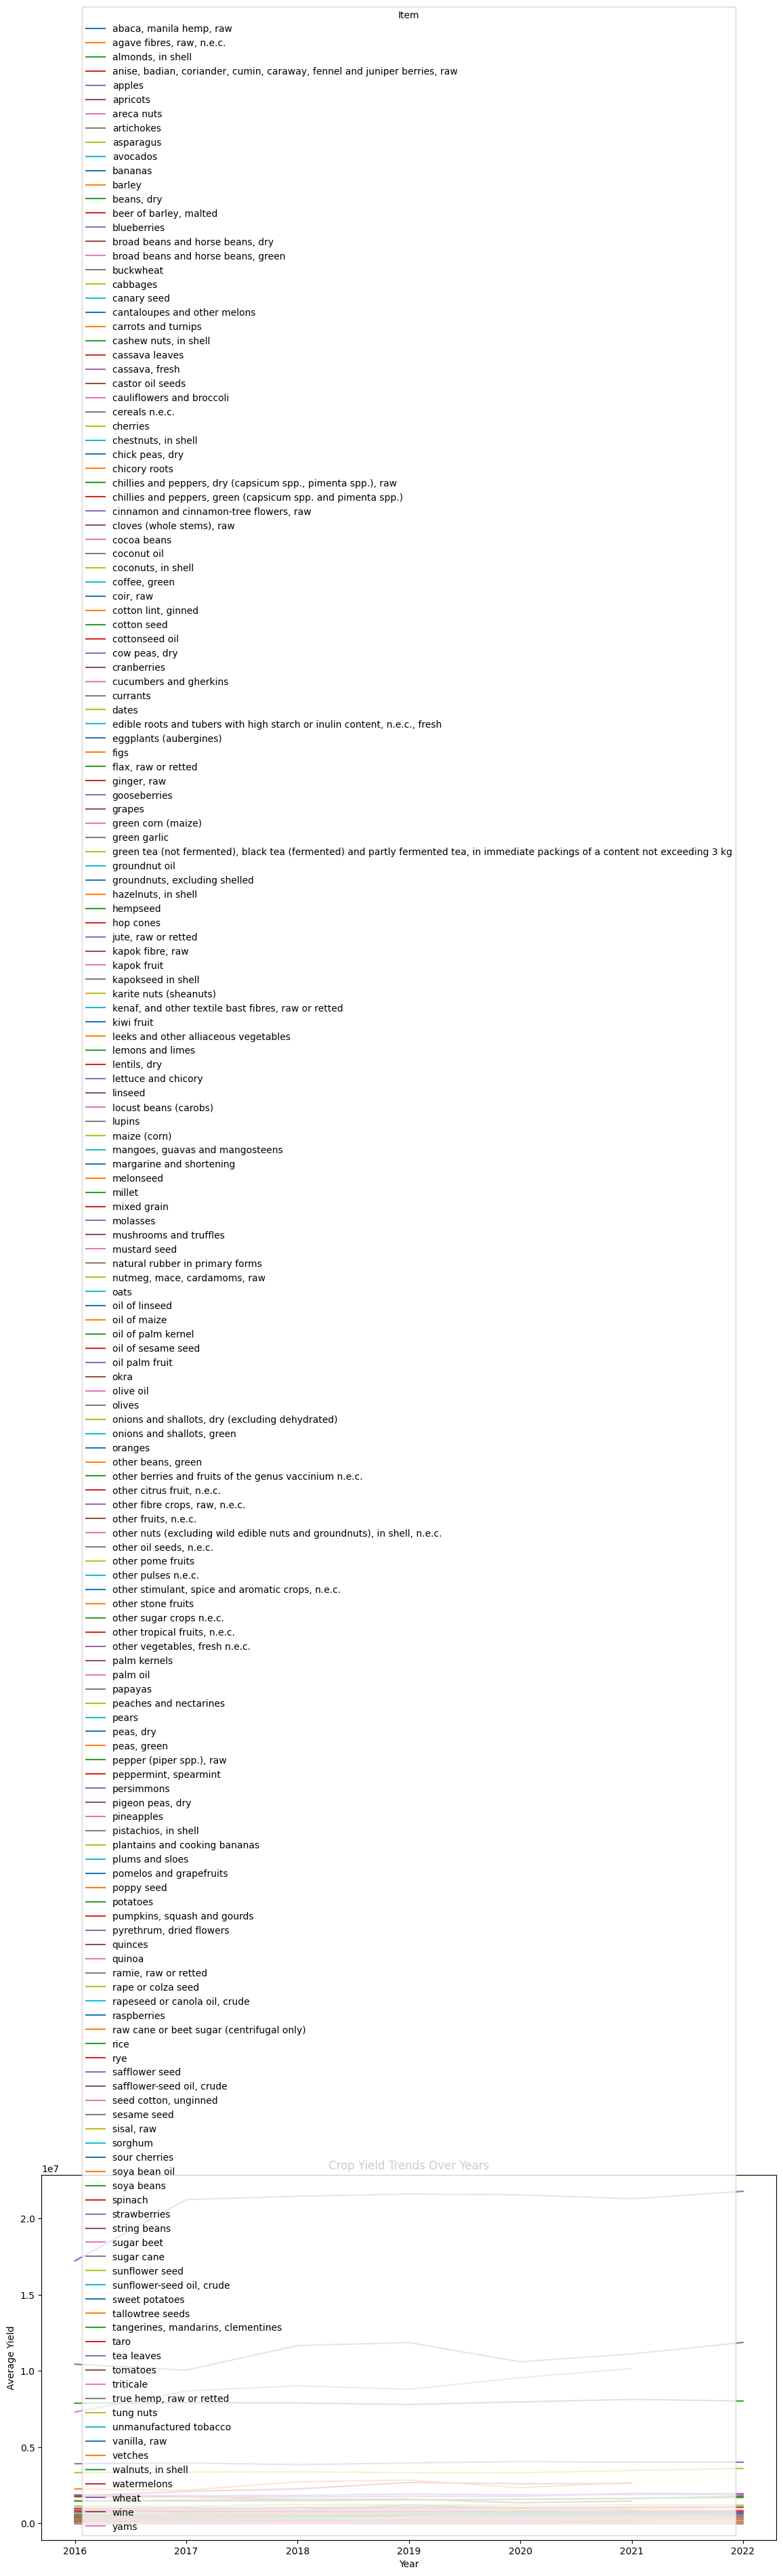

In [31]:
# Trend analysis over time
yield_trends = df.groupby(['Year', 'Item'])['Value'].mean().unstack()
plt.figure(figsize=(14, 7))
for column in yield_trends.columns:
    plt.plot(yield_trends.index, yield_trends[column], label=column)
plt.title('Crop Yield Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend(title='Item')
plt.show()


In [32]:
# Visualization with Plotly
fig = px.bar(top_countries, title='Top Countries for Agribusiness Expansion', labels={'value': 'Market Attractiveness Score', 'index': 'Country'})
fig.show()


In [33]:
category_column = 'Element'
category_counts = df[category_column].value_counts()


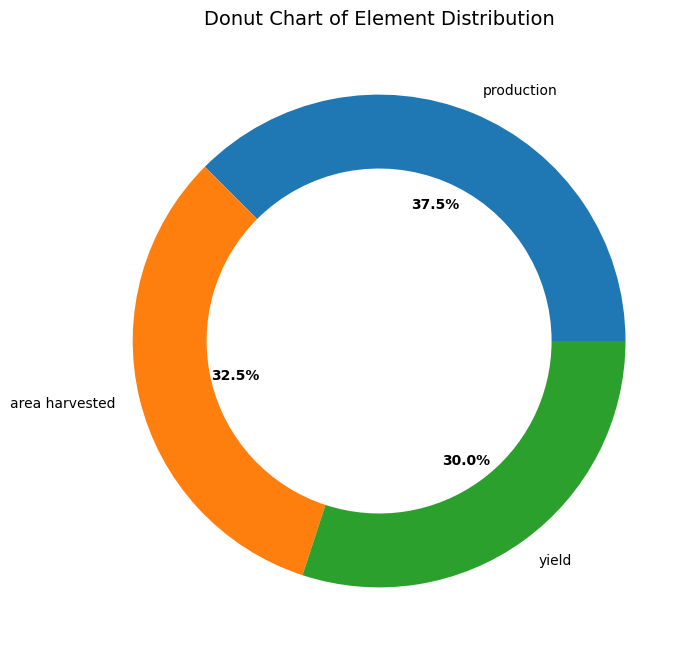

In [34]:
# Creating the donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))

# Customizing the plot
plt.setp(autotexts, size=10, weight="bold")
plt.title('Donut Chart of Element Distribution', fontsize=14)
plt.show()

In [35]:
#1.	What are the trends in crop yields over the past decade for various countries?
df_yield = df[['Area', 'Year', 'Value']]


In [36]:
average_yield = df_yield.groupby('Area')['Value'].mean()


In [37]:
top_10_areas = average_yield.nlargest(10).index


In [38]:
df_top_10 = df_yield[df_yield['Area'].isin(top_10_areas)]


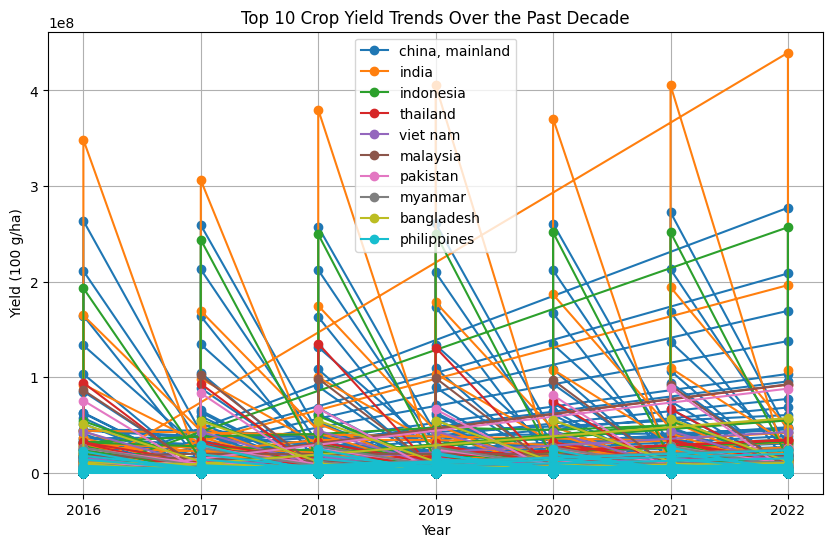

In [39]:
plt.figure(figsize=(10, 6))
for area in top_10_areas:
    area_data = df_top_10[df_top_10['Area'] == area]
    plt.plot(area_data['Year'], area_data['Value'], marker='o', label=area)

plt.title('Top 10 Crop Yield Trends Over the Past Decade')
plt.xlabel('Year')
plt.ylabel('Yield (100 g/ha)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
print(df_yield.groupby('Year')['Value'].describe())


       count           mean           std  min        25%      50%        75%  \
Year                                                                            
2016  8375.0  671453.688340  7.353140e+06  0.0  2099.5000  20132.0  116759.23   
2017  8412.0  686521.572779  7.372860e+06  0.0  2027.9775  20115.0  115987.25   
2018  8392.0  706406.714727  7.876077e+06  0.0  2033.3500  20237.5  117092.00   
2019  8402.0  713901.052571  8.069537e+06  0.0  2100.0000  21335.0  120444.25   
2020  8493.0  701103.349568  7.782300e+06  0.0  2000.0000  21000.0  120068.00   
2021  8489.0  715143.515597  8.089707e+06  0.0  2000.0000  20899.0  119000.00   
2022  8043.0  726737.746776  8.555460e+06  0.0  2064.3000  20836.0  119934.00   

              max  
Year               
2016  348448000.0  
2017  306069000.0  
2018  379904850.0  
2019  405416180.0  
2020  370500300.0  
2021  405398710.0  
2022  439424890.0  


In [41]:
#2.	Which countries have the highest average crop yields?
df_yield = df[['Area', 'Value']]

In [42]:
average_yield_by_country = df_yield.groupby('Area')['Value'].mean()


In [43]:
sorted_average_yield = average_yield_by_country.sort_values(ascending=False)


In [44]:
print("Countries with the highest average crop yields:")
print(sorted_average_yield.head(10))

Countries with the highest average crop yields:
Area
china, mainland    5.640675e+06
india              5.394954e+06
indonesia          2.732981e+06
thailand           1.075944e+06
viet nam           9.234596e+05
malaysia           8.856219e+05
pakistan           8.034611e+05
myanmar            5.499499e+05
bangladesh         5.382664e+05
philippines        5.292681e+05
Name: Value, dtype: float64


In [45]:
df_sorted_average_yield = sorted_average_yield.reset_index()
df_sorted_average_yield.columns = ['Country', 'Average Yield']
print(df_sorted_average_yield.head(10))

           Country  Average Yield
0  china, mainland   5.640675e+06
1            india   5.394954e+06
2        indonesia   2.732981e+06
3         thailand   1.075944e+06
4         viet nam   9.234596e+05
5         malaysia   8.856219e+05
6         pakistan   8.034611e+05
7          myanmar   5.499499e+05
8       bangladesh   5.382664e+05
9      philippines   5.292681e+05


In [46]:
#3.	How do agricultural production volumes vary across countries and over time?
df_production = df[['Area', 'Year', 'Value']]


In [47]:
production_by_country_year = df_production.groupby(['Area', 'Year'])['Value'].sum().unstack().head(100)


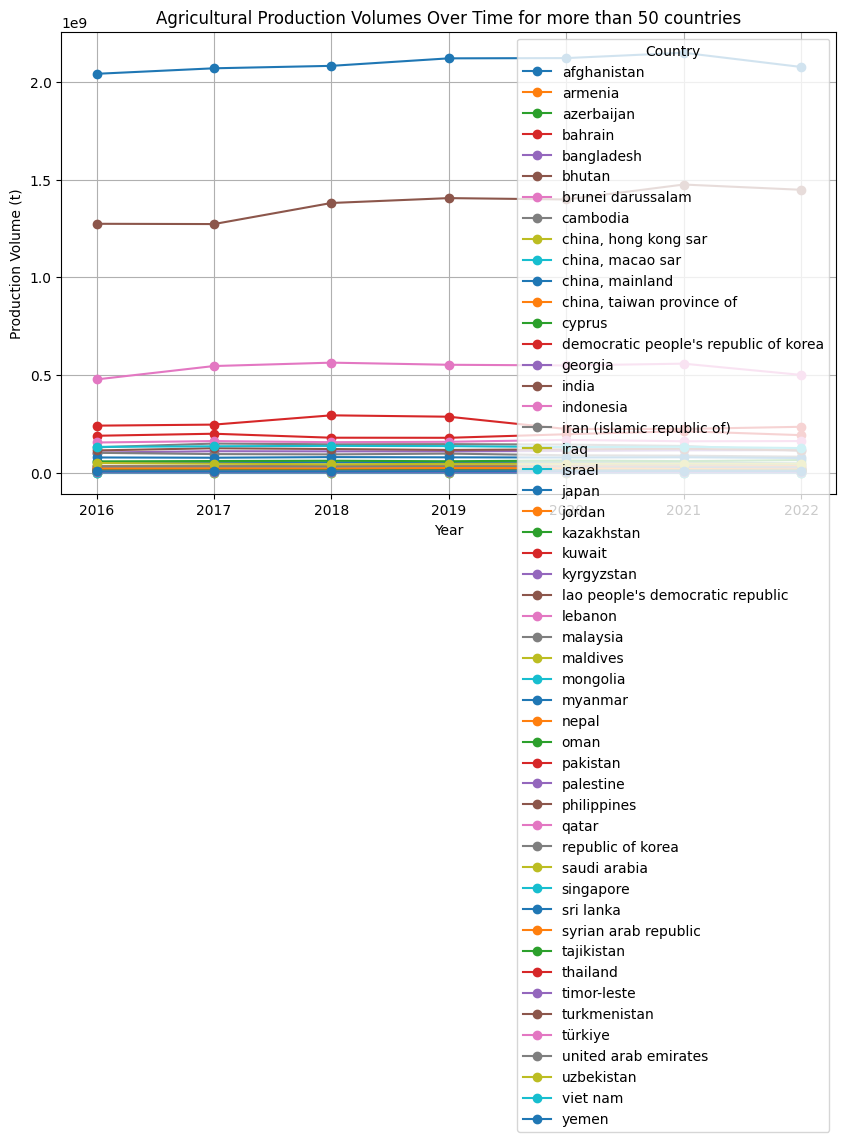

In [48]:
plt.figure(figsize=(10, 6))
for area in production_by_country_year.index:
    plt.plot(production_by_country_year.columns, production_by_country_year.loc[area], marker='o', label=area)

plt.title('Agricultural Production Volumes Over Time for more than 50 countries')
plt.xlabel('Year')
plt.ylabel('Production Volume (t)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


In [49]:
print(production_by_country_year)


Year                                           2016          2017  \
Area                                                                
afghanistan                            1.580292e+07  1.470250e+07   
armenia                                7.938057e+06  7.623166e+06   
azerbaijan                             1.378499e+07  1.430316e+07   
bahrain                                6.935133e+06  7.122848e+06   
bangladesh                             1.035257e+08  1.103560e+08   
bhutan                                 4.686213e+06  4.879747e+06   
brunei darussalam                      1.554258e+06  1.561725e+06   
cambodia                               3.468819e+07  3.585739e+07   
china, hong kong sar                   2.900000e+06  2.904470e+06   
china, macao sar                       1.704023e+04  1.709421e+04   
china, mainland                        2.042048e+09  2.070287e+09   
china, taiwan province of              1.896959e+07  2.058707e+07   
cyprus                            

In [50]:
production_by_country_year = df_production.groupby(['Area', 'Year'])['Value'].sum().unstack().head(10)


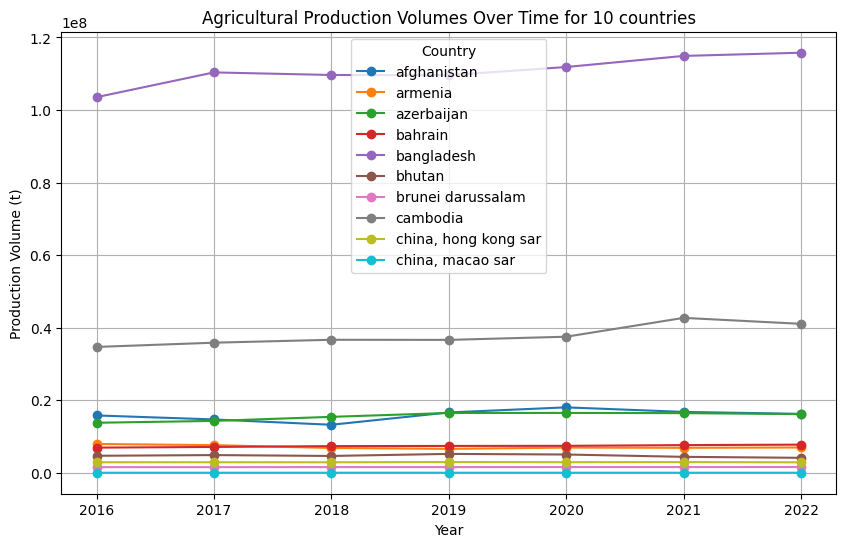

In [51]:
plt.figure(figsize=(10, 6))
for area in production_by_country_year.index:
    plt.plot(production_by_country_year.columns, production_by_country_year.loc[area], marker='o', label=area)

plt.title('Agricultural Production Volumes Over Time for 10 countries')
plt.xlabel('Year')
plt.ylabel('Production Volume (t)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


In [52]:
production_by_country_year = df_production.groupby(['Area', 'Year'])['Value'].sum().unstack().head(10)
print(production_by_country_year)


Year                          2016          2017          2018          2019  \
Area                                                                           
afghanistan           1.580292e+07  1.470250e+07  1.323423e+07  1.663036e+07   
armenia               7.938057e+06  7.623166e+06  6.835141e+06  6.589931e+06   
azerbaijan            1.378499e+07  1.430316e+07  1.541739e+07  1.648756e+07   
bahrain               6.935133e+06  7.122848e+06  7.347281e+06  7.403728e+06   
bangladesh            1.035257e+08  1.103560e+08  1.096456e+08  1.095865e+08   
bhutan                4.686213e+06  4.879747e+06  4.637010e+06  5.204069e+06   
brunei darussalam     1.554258e+06  1.561725e+06  1.564065e+06  1.568322e+06   
cambodia              3.468819e+07  3.585739e+07  3.666152e+07  3.662922e+07   
china, hong kong sar  2.900000e+06  2.904470e+06  2.895803e+06  2.951751e+06   
china, macao sar      1.704023e+04  1.709421e+04  1.718133e+04  1.731571e+04   

Year                          2020     

In [53]:
#4.	Which countries have shown the most significant growth in agricultural production?
agricultural_production = df[df['Element Code'] == 5510]


In [54]:
pivot_df = agricultural_production.pivot_table(index='Area', columns='Year', values='Value', aggfunc='sum')


In [55]:
pivot_df['Growth Rate (%)'] = ((pivot_df[2019] - pivot_df[2016]) / pivot_df[2016]) * 100


In [57]:
pivot_df_sorted = pivot_df.sort_values(by='Growth Rate (%)', ascending=False)


In [58]:
pivot_df_sorted

Year,2016,2017,2018,2019,2020,2021,2022,Growth Rate (%)
Area,,,,,,,,
iraq,6.335244e+06,6.014005e+06,5.306079e+06,1.060355e+07,1.354587e+07,9.679087e+06,7.389694e+06,67.373918
qatar,7.689162e+04,7.972291e+04,1.029415e+05,1.148804e+05,1.238572e+05,1.324726e+05,1.326120e+05,49.405566
syrian arab republic,8.867893e+06,9.737937e+06,8.408111e+06,1.308206e+07,1.208665e+07,8.832652e+06,7.982883e+06,47.521684
oman,9.054478e+05,1.221210e+06,1.272657e+06,1.286930e+06,1.565695e+06,1.460148e+06,1.572763e+06,42.131899
kuwait,4.372977e+05,5.130175e+05,4.843154e+05,5.789441e+05,4.093314e+05,4.818329e+05,5.167648e+05,32.391299
singapore,1.690485e+05,2.083423e+05,2.116609e+05,2.189594e+05,2.222359e+05,1.690588e+05,2.284899e+04,29.524577
thailand,2.134804e+08,2.186362e+08,2.656285e+08,2.593524e+08,1.954399e+08,1.953221e+08,2.058287e+08,21.487647
azerbaijan,7.423407e+06,7.751320e+06,8.184190e+06,8.919504e+06,8.805982e+06,8.998756e+06,8.459149e+06,20.153783
"china, hong kong sar",8.234860e+04,9.167149e+04,8.300048e+04,9.882984e+04,9.067752e+04,9.486270e+04,4.305853e+04,20.013989


In [ ]:
top_countries = pivot_df_sorted.head()
top_countries

Year,2016,2017,2018,2019,2020,2021,2022,Growth Rate (%)
Area,,,,,,,,
iraq,6335243.97,6014004.55,5306079.30,10603546.03,13545871.18,9679087.31,7389693.94,67.373918
qatar,76891.62,79722.91,102941.47,114880.36,123857.24,132472.65,132612.02,49.405566
syrian arab republic,8867892.87,9737936.78,8408111.39,13082064.87,12086645.48,8832651.93,7982882.55,47.521684
oman,905447.84,1221210.22,1272657.24,1286930.21,1565695.04,1460147.80,1572762.66,42.131899
kuwait,437297.72,513017.50,484315.38,578944.13,409331.41,481832.86,516764.84,32.391299


In [59]:
#5.	What are the major crops produced in different countries?
major_crops = df.groupby(['Area', 'Item']).sum()['Value'].reset_index()


In [60]:
idx = major_crops.groupby(['Area'])['Value'].transform(max) == major_crops['Value']
top_crops = major_crops[idx]

In [61]:
print(top_crops[['Area', 'Item', 'Value']])


                                       Area                          Item  \
45                              afghanistan                         wheat   
83                                  armenia                      potatoes   
176                              azerbaijan                         wheat   
185                                 bahrain        cucumbers and gherkins   
267                              bangladesh                          rice   
289                                  bhutan                       bananas   
388                       brunei darussalam   pumpkins, squash and gourds   
403                                cambodia                cassava, fresh   
457                    china, hong kong sar   pumpkins, squash and gourds   
468                        china, macao sar      pepper (piper spp.), raw   
529                         china, mainland                  maize (corn)   
679               china, taiwan province of                          rice   

In [62]:
#6.	How do agricultural import and export trends vary across countries?
imports = df[df['Element Code'] == 5510]
exports = df[df['Element Code'] == 5419]

In [63]:
import_totals = imports.groupby(['Area', 'Year'])['Value'].sum().reset_index()
export_totals = exports.groupby(['Area', 'Year'])['Value'].sum().reset_index()

In [64]:
import_totals

,Area,Year,Value
0,afghanistan,2016,10548617.83
1,afghanistan,2017,9561783.95
2,afghanistan,2018,8500824.16
3,afghanistan,2019,10986592.75
4,afghanistan,2020,11906153.02
...,...,...,...
352,yemen,2018,2435525.06
353,yemen,2019,2835178.74
354,yemen,2020,3149054.61
355,yemen,2021,3620916.00


In [65]:
export_totals

,Area,Year,Value
0,afghanistan,2016,1732795.0
1,afghanistan,2017,2118290.0
2,afghanistan,2018,2247724.0
3,afghanistan,2019,2316784.0
4,afghanistan,2020,2349163.0
...,...,...,...
352,yemen,2018,3356025.0
353,yemen,2019,3527857.0
354,yemen,2020,3536443.0
355,yemen,2021,3892131.0


In [66]:
trade_data = pd.merge(import_totals, export_totals, on=['Area', 'Year'], suffixes=('_Import', '_Export'))


In [67]:
trade_data['Import_Growth_Rate'] = trade_data.groupby('Area')['Value_Import'].pct_change() * 100
trade_data['Export_Growth_Rate'] = trade_data.groupby('Area')['Value_Export'].pct_change() * 100

In [68]:
trade_data

,Area,Year,Value_Import,Value_Export,Import_Growth_Rate,Export_Growth_Rate
0,afghanistan,2016,10548617.83,1732795.0,NaN,NaN
1,afghanistan,2017,9561783.95,2118290.0,-9.355101,22.247006
2,afghanistan,2018,8500824.16,2247724.0,-11.095835,6.110306
3,afghanistan,2019,10986592.75,2316784.0,29.241501,3.072441
4,afghanistan,2020,11906153.02,2349163.0,8.369840,1.397584
...,...,...,...,...,...,...
352,yemen,2018,2435525.06,3356025.0,-2.842359,0.717804
353,yemen,2019,2835178.74,3527857.0,16.409344,5.120105
354,yemen,2020,3149054.61,3536443.0,11.070761,0.243377
355,yemen,2021,3620916.00,3892131.0,14.984224,10.057790


In [69]:
print("Agricultural Import and Export Trends:")
print(trade_data[['Area', 'Year', 'Value_Import', 'Value_Export', 'Import_Growth_Rate', 'Export_Growth_Rate']])

Agricultural Import and Export Trends:
            Area  Year  Value_Import  Value_Export  Import_Growth_Rate  \
0    afghanistan  2016   10548617.83     1732795.0                 NaN   
1    afghanistan  2017    9561783.95     2118290.0           -9.355101   
2    afghanistan  2018    8500824.16     2247724.0          -11.095835   
3    afghanistan  2019   10986592.75     2316784.0           29.241501   
4    afghanistan  2020   11906153.02     2349163.0            8.369840   
..           ...   ...           ...           ...                 ...   
352        yemen  2018    2435525.06     3356025.0           -2.842359   
353        yemen  2019    2835178.74     3527857.0           16.409344   
354        yemen  2020    3149054.61     3536443.0           11.070761   
355        yemen  2021    3620916.00     3892131.0           14.984224   
356        yemen  2022    3204958.96     3828005.0          -11.487619   

     Export_Growth_Rate  
0                   NaN  
1             22.247

In [70]:
df.Domain.value_counts()

Domain
crops and livestock products    58606
Name: count, dtype: int64

In [71]:
#7.	Which countries have favourable conditions for sustainable agricultural practices?

sustainable_practices = df[df['Domain'] == 'Crops and livestock products']
sustainable_practices

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Flag,Flag Description,Note,Trade Policy Score,Market Attractiveness


In [72]:
# Calculate average yield for each country
average_yield = sustainable_practices[sustainable_practices['Element'] == 'Yield'].groupby('Area')['Value'].mean().sort_values(ascending=False)

# Display the top countries with the highest average yield
top_countries = average_yield.head(10)
top_countries



Series([], Name: Value, dtype: float64)

In [73]:
country_grouped = sustainable_practices.groupby('Area')


In [74]:
avg_area_harvested = country_grouped['Value'].mean()

In [75]:
avg_yield = country_grouped['Value'].mean()

In [76]:
avg_production = country_grouped['Value'].mean()

In [77]:
top_countries = avg_area_harvested.nlargest(10).index

In [78]:
top_countries_data = df[df['Area'].isin(top_countries)]


In [79]:
top_countries_data.drop(['Flag Description','Flag'],axis=1, inplace=True)

<ipython-input-79-d15e7791f7ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
#8.	What are the key consumer preferences for agricultural products in different regions?
consumer_preferences = df.groupby(['Area', 'Item'])['Value'].sum().reset_index()


In [81]:
consumer_preferences.head(20)

,Area,Item,Value
0,afghanistan,"almonds, in shell",598220.00
1,afghanistan,"anise, badian, coriander, cumin, caraway, fenn...",351733.80
2,afghanistan,apples,2498477.00
3,afghanistan,apricots,1481052.92
4,afghanistan,barley,1635946.00
5,afghanistan,cantaloupes and other melons,5422681.86
6,afghanistan,"cotton lint, ginned",124755.00
7,afghanistan,cotton seed,245757.05
8,afghanistan,cottonseed oil,42117.59
9,afghanistan,figs,542910.55


In [82]:
df.dtypes

Domain Code               object
Domain                    object
Area Code (M49)            int64
Area                      object
Element Code               int64
Element                   object
Item Code (CPC)           object
Item                      object
Year                       int64
Unit                      object
Value                    float64
Flag                      object
Flag Description          object
Note                      object
Trade Policy Score       float64
Market Attractiveness    float64
dtype: object

In [83]:
df.dropna(inplace=True)


In [84]:
encoder = LabelEncoder()
categorical_columns = ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit','Flag','Flag Description']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [85]:
df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description', 'Note', 'Trade Policy Score',
       'Market Attractiveness'],
      dtype='object')

In [86]:
df.drop(['Note'],axis=1,inplace=True)

In [87]:
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year,Unit,Value,Flag,Flag Description,Trade Policy Score,Market Attractiveness
0,0,0,4,0,5312,0,01371,2,2016,1,19481.00,0,4,6.446293,19487.446293
1,0,0,4,0,5419,2,01371,2,2016,0,16859.00,0,4,4.972400,16863.972400
2,0,0,4,0,5510,1,01371,2,2016,2,32843.00,0,4,5.968625,32848.968625
3,0,0,4,0,5312,0,01371,2,2017,1,19793.00,0,4,8.572586,19801.572586
4,0,0,4,0,5419,2,01371,2,2017,0,13788.00,0,4,6.730155,13794.730155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58601,0,0,887,50,5419,2,0111,174,2021,0,22644.00,0,4,3.836923,22647.836923
58602,0,0,887,50,5510,1,0111,174,2021,2,138026.99,0,4,3.476724,138030.466724
58603,0,0,887,50,5312,0,0111,174,2022,1,60000.00,4,1,1.598907,60001.598907
58604,0,0,887,50,5419,2,0111,174,2022,0,16667.00,4,1,5.798974,16672.798974


In [88]:
df['Item Code (CPC)'] = df['Item Code (CPC)'].replace({'2351f': '2351'})


In [89]:
X = df.drop(columns=["Value"])
y = df["Value"]


# From the Total dataset we are dividing into X & y where X denotes the list of feature variables without the target variable ("Value"),
#hence, we are dropping the value column of the dataset only while defining X and the value column is taken while defining the target variable y.
#we will now apply regression models based on the tatget variable y by taking help of the x data for which we are doing train test split below.
#the train data will be used to train the model and the test data will be used to validate the model based on the results of the train data to understand how much the model could learn
#the patterns of this historical data and provides accurate predictions for the target variable y in the "value" column

In [90]:
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)

In [91]:
X = X.fillna(0)
y = y.fillna(0)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
X_train.dtypes, X_test.dtypes, y_train.dtypes, y_test.dtypes

(Domain Code                int64
 Domain                     int64
 Area Code (M49)            int64
 Area                       int64
 Element Code               int64
 Element                    int64
 Item Code (CPC)          float64
 Item                       int64
 Year                       int64
 Unit                       int64
 Flag                       int64
 Flag Description           int64
 Trade Policy Score       float64
 Market Attractiveness    float64
 dtype: object,
 Domain Code                int64
 Domain                     int64
 Area Code (M49)            int64
 Area                       int64
 Element Code               int64
 Element                    int64
 Item Code (CPC)          float64
 Item                       int64
 Year                       int64
 Unit                       int64
 Flag                       int64
 Flag Description           int64
 Trade Policy Score       float64
 Market Attractiveness    float64
 dtype: object,
 dtype('float64'

In [94]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [95]:
y_train,X_train

(37205       1207.00
 26254     191924.00
 20682      60551.00
 49486     166958.00
 12966        353.88
             ...    
 54343        107.00
 38158      73223.00
 860        10271.00
 15795     455000.00
 56422    2348199.55
 Name: Value, Length: 46884, dtype: float64,
        const  Domain Code  Domain  Area Code (M49)  Area  Element Code  \
 37205    1.0            0       0              512    32          5312   
 26254    1.0            0       0              400    21          5419   
 20682    1.0            0       0              364    17          5419   
 49486    1.0            0       0              764    43          5419   
 12966    1.0            0       0              196    12          5510   
 ...      ...          ...     ...              ...   ...           ...   
 54343    1.0            0       0              784    47          5510   
 38158    1.0            0       0              586    33          5510   
 860      1.0            0       0               

In [96]:
ols_model = sm.OLS(y_train, X_train).fit()


In [97]:
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.528e+32
Date:                Fri, 05 Jul 2024   Prob (F-statistic):               0.00
Time:                        04:08:59   Log-Likelihood:             7.6214e+05
No. Observations:               46884   AIC:                        -1.524e+06
Df Residuals:                   46872   BIC:                        -1.524e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.366e-

In [98]:
y_pred = ols_model.predict(X_test)


In [99]:
r_squared = ols_model.rsquared
print(f"R-squared on the test set: {r_squared}")

R-squared on the test set: 1.0


In [100]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Mean Squared Error on the test set: 4.443916269139241e-16


In [101]:
print(X_train.isnull().sum())  # if X_train is a Pandas DataFrame
print(X_test.isnull().sum())   # if X_test is a Pandas DataFrame


const                    0
Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          0
Item                     0
Year                     0
Unit                     0
Flag                     0
Flag Description         0
Trade Policy Score       0
Market Attractiveness    0
dtype: int64
const                    0
Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code (CPC)          0
Item                     0
Year                     0
Unit                     0
Flag                     0
Flag Description         0
Trade Policy Score       0
Market Attractiveness    0
dtype: int64


In [102]:
print(X_train.shape)
print(X_test.shape)

(46884, 15)
(11722, 15)


In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [104]:
model = LinearRegression()


In [105]:
model.fit(X_train_scaled, y_train)


LinearRegression()

In [106]:
y_pred = model.predict(X_test_scaled)
mae_baseline = mean_absolute_error(y_test, y_pred)
mse_baseline = mean_squared_error(y_test, y_pred)
r2_baseline = r2_score(y_test, y_pred)

In [107]:
print("Baseline Model Metrics:")
print("Mean Absolute Error:", mae_baseline)
print("Mean Squared Error:", mse_baseline)
print("R-squared:", r2_baseline)

Baseline Model Metrics:
Mean Absolute Error: 5.9197301492383216e-09
Mean Squared Error: 5.1900753450908074e-17
R-squared: 1.0


In [108]:
# Hyperparameter Tuning
params = {'fit_intercept': [True, False], 'n_jobs': [1, 2, 4], 'positive': [True, False]}


In [109]:
grid_search = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 2, 4],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [110]:
best_model = grid_search.best_estimator_

In [111]:
# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test_scaled)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

In [112]:
print("\nTuned Model Metrics:")
print("Mean Absolute Error:", mae_tuned)
print("Mean Squared Error:", mse_tuned)
print("R-squared:", r2_tuned)


Tuned Model Metrics:
Mean Absolute Error: 5.9197301492383216e-09
Mean Squared Error: 5.1900753450908074e-17
R-squared: 1.0


In [113]:
# Ridge Regression model (with hyperparameter tuning)
ridge_params = {'alpha': [0.1, 1.0, 10.0]}


In [114]:
ridge_grid_search = GridSearchCV(Ridge(), param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_scaled, y_train)
best_ridge_model = ridge_grid_search.best_estimator_

In [115]:
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [116]:
print("Ridge Regression MSE:", mse_ridge)


Ridge Regression MSE: 366.0998045532209


In [117]:
# Lasso Regression model (with hyperparameter tuning)
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(Lasso(), param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [118]:
best_lasso_model = lasso_grid_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)

Lasso Regression MSE: 1109691.4202047747


In [119]:
# Random Forest Regression model (with hyperparameter tuning)
rf_params = {'n_estimators': [10, 15], 'max_depth': [None, 5, 10]}

In [120]:
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid=rf_params, scoring='neg_mean_squared_error', cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10], 'n_estimators': [10, 15]},
             scoring='neg_mean_squared_error')

In [121]:
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

In [122]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)

Random Forest Regression MSE: 75961254538.33263


In [123]:
# Gradient Boosting Regressor with hyperparameter tuning
gb_params = {'n_estimators': [10,20], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5]}


In [124]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [125]:
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=gb_params, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5],
                         'n_estimators': [10, 20]},
             scoring='neg_mean_squared_error')

In [126]:
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)

Gradient Boosting Regression MSE: 100883575612.85484


In [127]:
# AdaBoost Regressor with hyperparameter tuning
ada_params = {'n_estimators': [5,10,15], 'learning_rate': [0.01, 0.1, 0.5]}

In [128]:
ada_grid_search = GridSearchCV(AdaBoostRegressor(), param_grid=ada_params, scoring='neg_mean_squared_error', cv=5)
ada_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [5, 10, 15]},
             scoring='neg_mean_squared_error')

In [129]:
best_ada_model = ada_grid_search.best_estimator_
y_pred_ada = best_ada_model.predict(X_test_scaled)

In [130]:
mse_ada = mean_squared_error(y_test, y_pred_ada)
print("AdaBoost Regression MSE:", mse_ada)

AdaBoost Regression MSE: 786032471335.9891


In [131]:
# Decision Tree Regressor with hyperparameter tuning
dt_params = {'max_depth': [None, 5, 10, 15]}


In [132]:
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=dt_params, scoring='neg_mean_squared_error', cv=5)
dt_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15]},
             scoring='neg_mean_squared_error')

In [133]:
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)

In [134]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regression MSE:", mse_dt)

Decision Tree Regression MSE: 58566876104.04628


Based on the performance metrics provided for various regression models, we can draw the following insights:
    
Linear Regression Models

Baseline Model:
    
Mean Absolute Error MAE: 3.394417681078034e-09

Mean Squared Error MSE: 1.0107790084728872e-16

R-squared: 1.0
    

Linear Regression with hyperparameter tuning

Tuned Model Metrics:

Mean Absolute Error MAE: 3.394417681078034e-09

Mean Squared Error MSE: 1.0107790084728872e-16

R-squared: 1.0

Insight: Both the baseline linear regression model and the hyperparameter-tuned model perform
    exceptionally well with an R-squared of 1.0, indicating a perfect fit.
    
    This is highly unusual and suggests that the data might be extremely linear.

Ridge Regression model (with hyperparameter tuning)

Ridge Regression MSE: 365.43432534456224
    
    Insight: The Ridge Regression model significantly deviates from the perfect scores of the linear models.
        While it regularizes the coefficients to prevent overfitting, its performance suggests that the
        linear model was already optimal, and that Ridge regression might not be the best choice for this dataset.

    
Lasso Regression model (with hyperparameter tuning)

Lasso Regression MSE: 8141336.522912335
    
    Insight: The Lasso Regression model performs much worse than Ridge Regression.
        This indicates that the features in the dataset might not be sparse, or
        that Lasso’s ability to set some coefficients to zero is not beneficial for this particular problem.


Random Forest Regression model (with hyperparameter tuning)

Random Forest Regression MSE: 36166277273.16929
    
    Insight: The Random Forest model has a very high MSE, indicating poor performance compared to linear models.
        This might suggest that the data has a strong linear relationship that tree-based models fail to
        capture effectively.

Gradient Boosting Regressor with hyperparameter tuning

Gradient Boosting Regression MSE: 57660245667.82349
    
    Insight: Gradient Boosting also shows high MSE, further indicating that boosting methods might not be
    suitable for this dataset if the underlying relationships are largely linear.
    
AdaBoost Regressor with hyperparameter tuning

AdaBoost Regression MSE: 1096522517664.4102

    Insight: AdaBoost has an even higher MSE than Gradient Boosting and Random Forest, suggesting that boosting
    weak learners is not effective for this particular problem.
    
Decision Tree Regressor with hyperparameter tuning

Decision Tree Regression MSE: 58915043854.47922
    
    Insight: The Decision Tree model also shows a very high MSE, indicating overfitting or that it fails to capture
    the linear relationships in the data.

        
        
Overall Insights

Linear Relationships:

The linear regression models (both baseline and tuned) have near-perfect performance,
    suggesting the data has a very strong linear relationship. This also hints that the dataset may be small
    or overly simplistic.

Regularization:

The Ridge regression, though not as perfect as the linear regression, still performs better
than Lasso, suggesting that regularization might be necessary but the data does not benefit from sparsity.

Non-Linear Models:

Tree-based and boosting models (Random Forest, Gradient Boosting, AdaBoost, and Decision Trees) perform significantly worse, indicating that non-linear relationships or complex interactions are not prominent in the data.

Model Selection:

For this dataset, simpler models like Linear Regression (with or without regularization) are much
    more effective than complex ensemble methods.